In [4]:
import numpy as np
import pandas as pd

In [123]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [71]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

## Load the data

In [2]:
dev = pd.read_csv("civility_data/dev.tsv", sep='\t')
mini_demographic_dev = pd.read_csv("civility_data/mini_demographic_dev.tsv", sep='\t')

In [5]:
dev.head(5)

,text,label,category,perspective_score
0,@USER She should ask a few native Americans wh...,OFF,UNT,0.311852
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,0.566334
2,Amazon is investigating Chinese employees who ...,NOT,NaN,0.110361
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,0.927032
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,0.319764


In [6]:
mini_demographic_dev.head(5)

,text,demographic,perspective_score
0,People make mistakes. It takes a good person t...,White,0.041031
1,"Only one on our road with power, but no cable ...",White,0.061435
2,I love when baby's yawn I think it's so cute.,White,0.056817
3,theres so many hoes now that i actually think ...,White,0.503459
4,Today is the day Adalynn Alexis will be here! ...,White,0.092183


## Off-the-shelf Model Exploration

- Use the provided `perspecitve_score` values to classify each tweet in `dev.tsv` and `mini_demographic_dev.tsv` as toxic or non-toxic. As a starting point, assume that a tweet is considered offensive if it contains a toxicity score > 0.8 (you may optionally explore other thresholds).
- Using `dev.tsv` report the Accuracy and F1 Scores of PerspectiveAPI for offensiveness classification.
- Using `mini_demographic_dev.tsv`, separately report the FPR for each demographic group (assuming no tweet in `mini_demographic_dev.tsv` is actually offensive).
- Briefly discuss your results


#### Accuracy and F1-scores of PerspectiveAPI for offensive classifaction on `dev.tsv`

Get toxicity prediction

In [10]:
def get_toxicity_prediction(perspective_score):
    return "OFF" if perspective_score > 0.8 else "NOT"
get_toxicity_prediction(0.801)

'OFF'

In [11]:
dev["pred_label"] = dev["perspective_score"].apply(get_toxicity_prediction)

Present statistics

In [104]:
def get_statistics(y_true, y_pred, labels=None):
    
    stats = {}
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels)
    stats["CM"] = cm
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Cache to stats
    stats["FP"] = FP
    stats["FN"] = FN
    stats["TP"] = TP
    stats["TN"] = TN

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    stats["TPR"] = TPR
    stats["RECALL"] = TPR
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    stats["TNR"] = TNR
    stats["SPECIFICITY"] = TNR
    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    stats["PPV"] = PPV
    stats["PRECISION"] = PPV
    
    # Negative predictive value
    NPV = TN/(TN+FN)
    stats["NPV"] = NPV
    
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    stats["FPR"] = FPR
    
    # False negative rate
    FNR = FN/(TP+FN)
    stats["FNR"] = FNR
    
    # False discovery rate
    FDR = FP/(TP+FP)
    stats["FDR"] = FDR

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    stats["ACC"] = ACC
    
    # F1 score
    F1 = 2 * PPV * TPR / (PPV + TPR)
    stats["F1"] = F1
    
    classification_rep = classification_report(dev["label"], dev["pred_label"], labels)
    stats["REPORT"] = classification_rep
    
    return stats

In [105]:
correct = sum(np.where(dev["pred_label"] == dev["label"], 1, 0))
total = len(dev)
accuracy = correct/total
print("Accuracy of PerspectiveAPI is", accuracy)

Accuracy of PerspectiveAPI is 0.7643504531722054


In [106]:
stats = get_statistics(y_true=dev["label"], y_pred=dev["pred_label"], labels=["OFF", "NOT"])
print(stats["REPORT"])

              precision    recall  f1-score   support

         OFF       0.89      0.33      0.49       440
         NOT       0.75      0.98      0.85       884

    accuracy                           0.76      1324
   macro avg       0.82      0.66      0.67      1324
weighted avg       0.79      0.76      0.73      1324



In [107]:
stats["ACC"]

array([0.76435045, 0.76435045])

#### Report the FPR for each demographic group using `mini_demographic_dev.tsv`
Assume no tweet in `mini_demographic_dev.tsv` is actually offensive.

In [108]:
mini_demographic_dev["label"] = ["NOT" for _ in range(len(mini_demographic_dev))]

In [109]:
mini_demographic_dev["pred"] = mini_demographic_dev["perspective_score"].apply(get_toxicity_prediction)

In [110]:
mini_demographic_dev.head(5)

,text,demographic,perspective_score,pred,label
0,People make mistakes. It takes a good person t...,White,0.041031,NOT,NOT
1,"Only one on our road with power, but no cable ...",White,0.061435,NOT,NOT
2,I love when baby's yawn I think it's so cute.,White,0.056817,NOT,NOT
3,theres so many hoes now that i actually think ...,White,0.503459,NOT,NOT
4,Today is the day Adalynn Alexis will be here! ...,White,0.092183,NOT,NOT


In [111]:
unique_demographics = mini_demographic_dev["demographic"].unique()
unique_demographics

array(['White', 'Hispanic', 'AA', 'Other'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demographic', ylabel='count'>

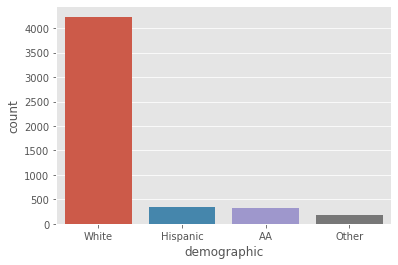

In [112]:
sns.countplot(mini_demographic_dev["demographic"])

In [113]:
white_df = mini_demographic_dev[mini_demographic_dev["demographic"] == "White"]
hispanic_df = mini_demographic_dev[mini_demographic_dev["demographic"] == "Hispanic"]
AA_df = mini_demographic_dev[mini_demographic_dev["demographic"] == "AA"]
other_df = mini_demographic_dev[mini_demographic_dev["demographic"] == "Other"]

In [129]:
def get_fpr(df, labels=None):
    # FPR = FP/(FP+TN)
    stats = get_statistics(df["pred"], df["label"], labels=labels)
    return stats["FP"][1] / (stats["FP"][1] + stats["TN"][0])

White FPR: 0.07319952774498228
Hispanic FPR: 0.10149253731343283
AA FPR: 0.1897590361445783
Other FPR: 0.011764705882352941


Text(0.5, 1.0, 'False Positive Rate (FPR) of Toxicity Detection')

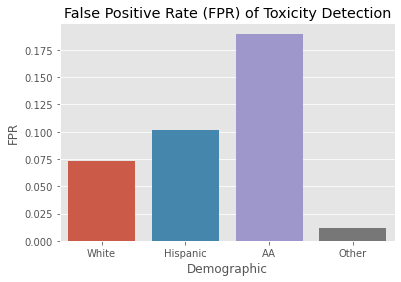

In [140]:
# FPR = FP/(FP+TN)
white_fpr = get_fpr(white_df, labels=["OFF", "NOT"])
hispanic_fpr = get_fpr(hispanic_df, labels=["OFF", "NOT"])
AA_fpr = get_fpr(AA_df, labels=["OFF", "NOT"])
other_fpr = get_fpr(other_df, labels=["OFF", "NOT"])

print("White FPR:", white_fpr)
print("Hispanic FPR:", hispanic_fpr)
print("AA FPR:", AA_fpr)
print("Other FPR:", other_fpr)

ax = sns.barplot(['White', 'Hispanic', 'AA', 'Other'], [white_fpr, hispanic_fpr, AA_fpr, other_fpr])
ax.set_ylabel("FPR")
ax.set_xlabel("Demographic")
ax.set_title("False Positive Rate (FPR) of Toxicity Detection")

## Custom Model Exploration

- Build your own classifier to distinguish offensive (`OFF`) tweets from non-offensive (`NOT`) tweets. Your model should be trained on `train.tsv` and should obtain an accuracy of at least 70% and an F1 score of at least 80% over `dev.tsv` (this should be easy to obtain with surface-level features).
- Report the accuracy and F1 score of your model over `dev.tsv`
- Report FPR over `mini_demographic_dev.tsv`
- Briefly discuss your results. How does your model compare to PerspectiveAPI?